# Criação do modelo

Importando a biblioteca Pandas

In [0]:
import pandas as pd 

**Importando os modelos da sklearn com SVM (Maquina de vetor e suporte), DecisionTreeClassifier(Arvore de decição), KNeighborsClassifier (KNN) logistic regression(Lr), GridSearchCV(Ajuste de hiperparametros) , confusion_matrix (Matriz de confução), cross_val_score (validação cruzada), accuracy_score(avaliação média de acerto do modelo. )**

In [0]:
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
import itertools

**Carregando os dados local para maquina virtual do google.**

In [5]:
from google.colab import files
uploaded = files.upload()

Saving german_credit.csv to german_credit.csv


**Criando um data freme com os dados**

In [0]:
import io
df = pd.read_csv(io.StringIO(uploaded['german_credit.csv'].decode('utf-8')))

**Print nas 5 primeiras linhas do data freme**




In [7]:
df.head(5)


,Creditability,Account Balance,Duration of Credit (month),Payment Status of Previous Credit,Purpose,Credit Amount,Value Savings/Stocks,Length of current employment,Instalment per cent,Sex & Marital Status,...,Duration in Current address,Most valuable available asset,Age (years),Concurrent Credits,Type of apartment,No of Credits at this Bank,Occupation,No of dependents,Telephone,Foreign Worker
0,1,1,18,4,2,1049,1,2,4,2,...,4,2,21,3,1,1,3,1,1,1
1,1,1,9,4,0,2799,1,3,2,3,...,2,1,36,3,1,2,3,2,1,1
2,1,2,12,2,9,841,2,4,2,2,...,4,1,23,3,1,1,2,1,1,1
3,1,1,12,4,0,2122,1,3,3,3,...,2,1,39,3,1,2,2,2,1,2
4,1,1,12,4,0,2171,1,3,4,3,...,4,2,38,1,2,2,2,1,1,2


**Importando a biblioteca numpy**

In [0]:
import numpy as np

**Importando a biblioteca matplotlib para criação de gráficos**

In [0]:
import matplotlib.pyplot as plt

**Média dos dados por cada classe**

In [10]:
df.groupby('Creditability').mean()

,Account Balance,Duration of Credit (month),Payment Status of Previous Credit,Purpose,Credit Amount,Value Savings/Stocks,Length of current employment,Instalment per cent,Sex & Marital Status,Guarantors,Duration in Current address,Most valuable available asset,Age (years),Concurrent Credits,Type of apartment,No of Credits at this Bank,Occupation,No of dependents,Telephone,Foreign Worker
Creditability,,,,,,,,,,,,,,,,,,,,
0,1.903333,24.860000,2.166667,2.903333,3938.126667,1.673333,3.170000,3.096667,2.586667,1.126667,2.850000,2.586667,33.96,2.556667,1.913333,1.366667,2.936667,1.153333,1.376667,1.013333
1,2.865714,19.207143,2.707143,2.795714,2985.442857,2.290000,3.475714,2.920000,2.722857,1.152857,2.842857,2.260000,36.22,2.725714,1.934286,1.424286,2.890000,1.155714,1.415714,1.047143


**Realizando uma análise descritiva de todas as colunas dos dados**

In [11]:
for item in df.columns:
   print(item)
   print("")
   print(df[item].describe())
   print()

Creditability

count    1000.000000
mean        0.700000
std         0.458487
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: Creditability, dtype: float64

Account Balance

count    1000.000000
mean        2.577000
std         1.257638
min         1.000000
25%         1.000000
50%         2.000000
75%         4.000000
max         4.000000
Name: Account Balance, dtype: float64

Duration of Credit (month)

count    1000.000000
mean       20.903000
std        12.058814
min         4.000000
25%        12.000000
50%        18.000000
75%        24.000000
max        72.000000
Name: Duration of Credit (month), dtype: float64

Payment Status of Previous Credit

count    1000.00000
mean        2.54500
std         1.08312
min         0.00000
25%         2.00000
50%         2.00000
75%         4.00000
max         4.00000
Name: Payment Status of Previous Credit, dtype: float64

Purpose

count    1000.000000
mean        2.828000
std    

**boxplot do peso ao nascer por classe**

/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


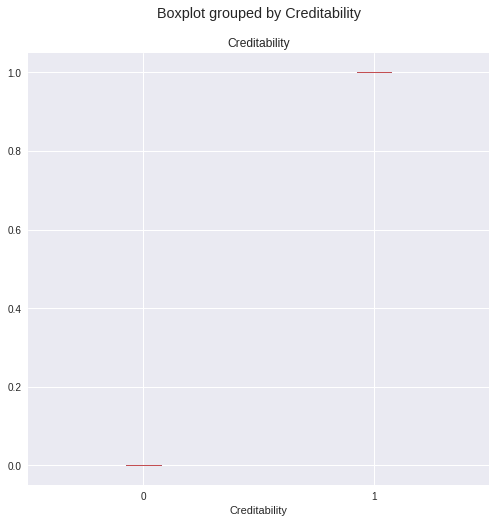

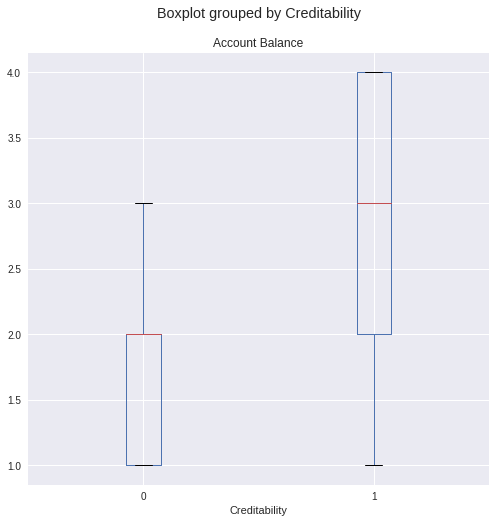

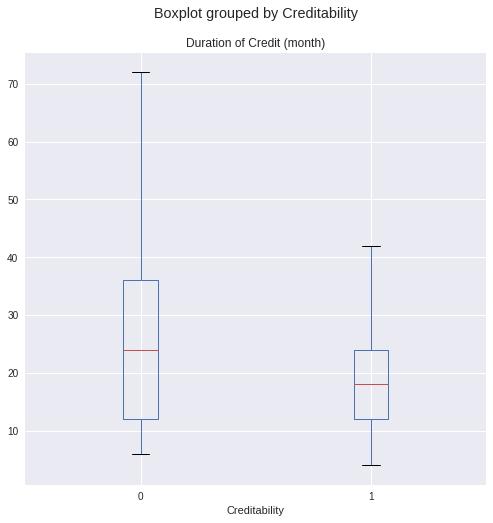

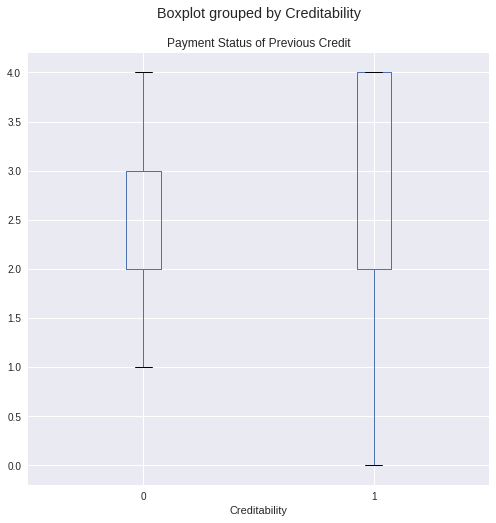

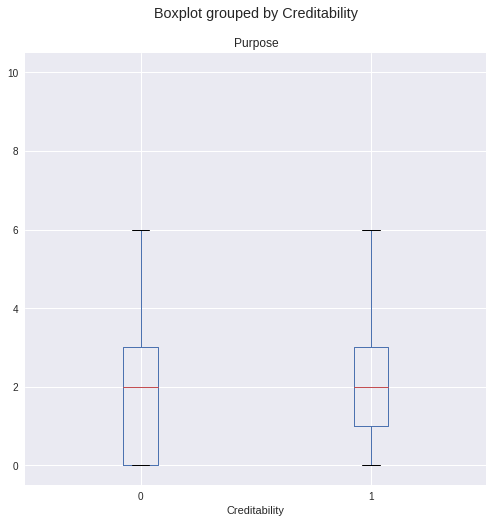

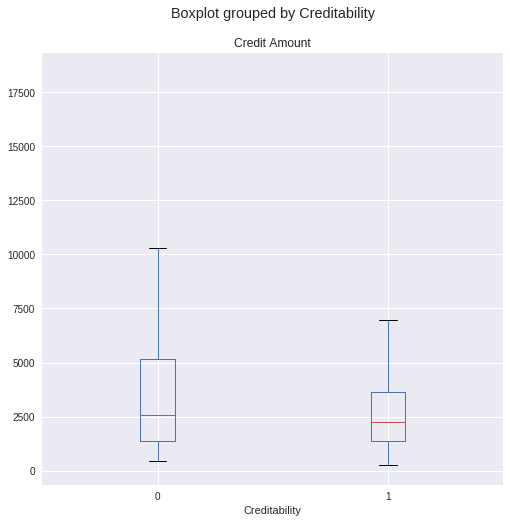

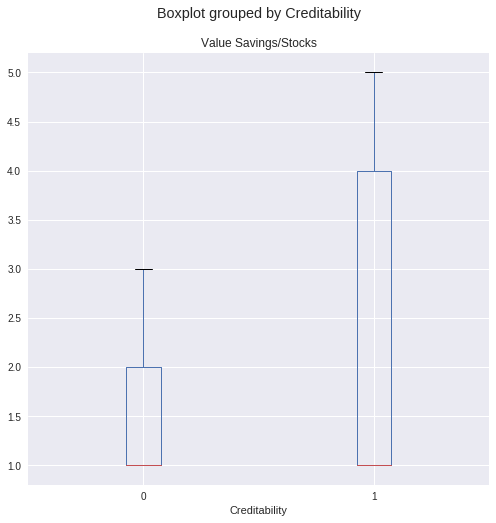

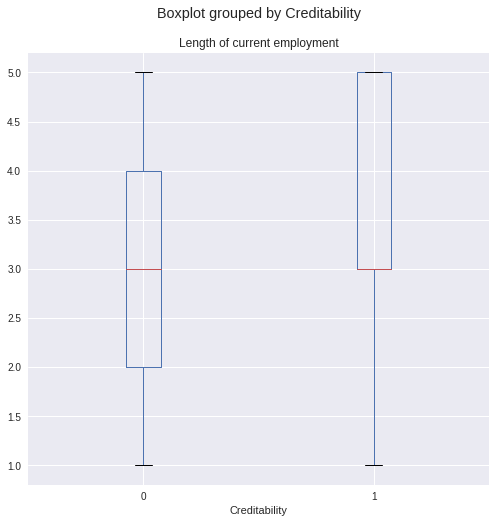

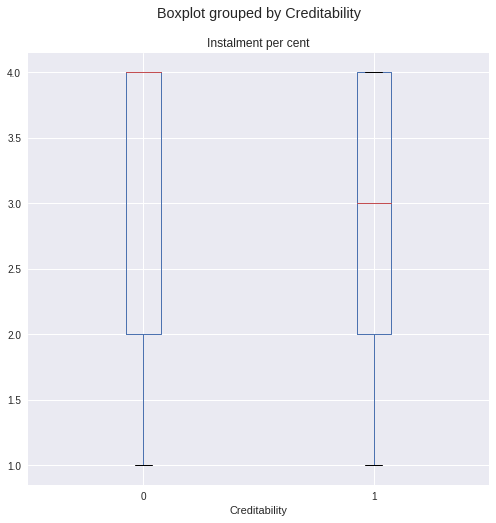

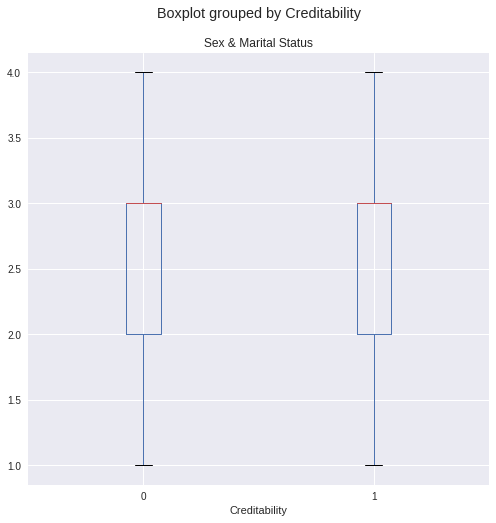

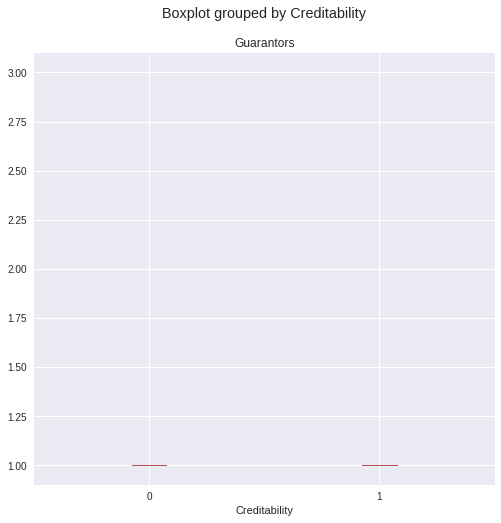

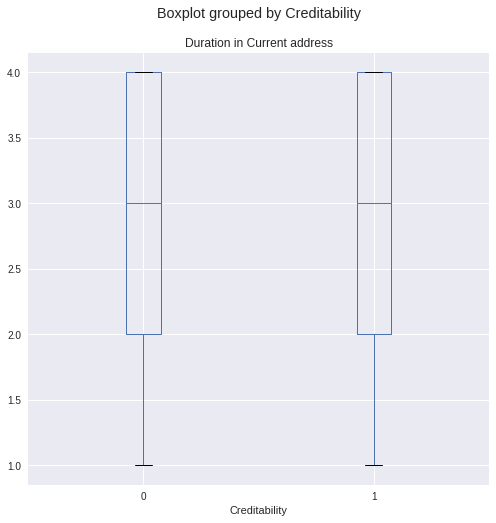

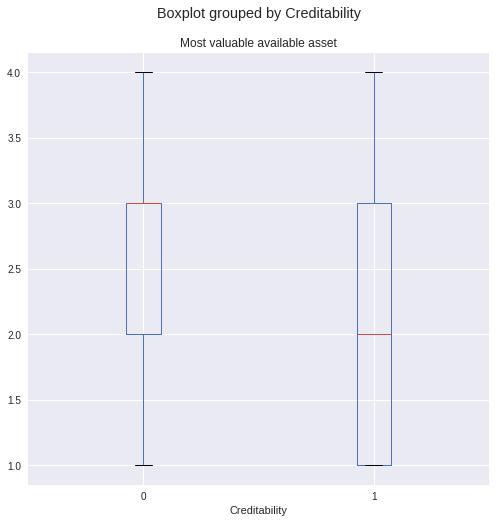

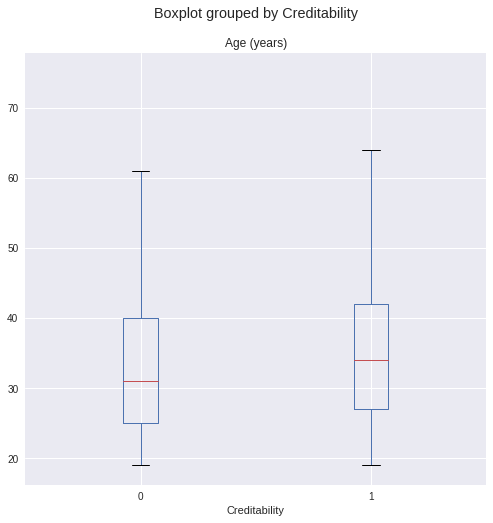

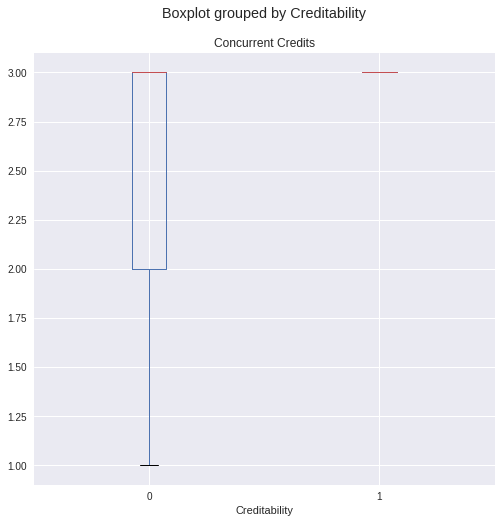

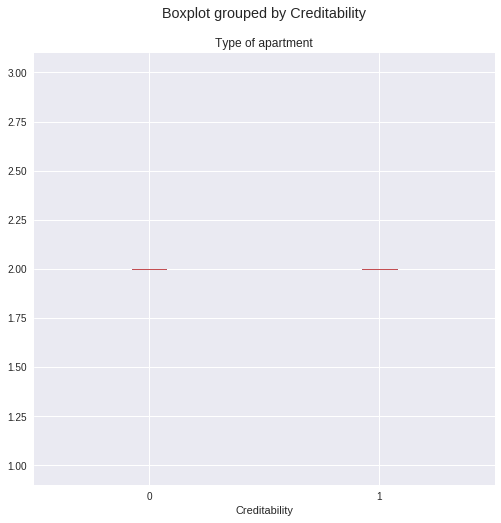

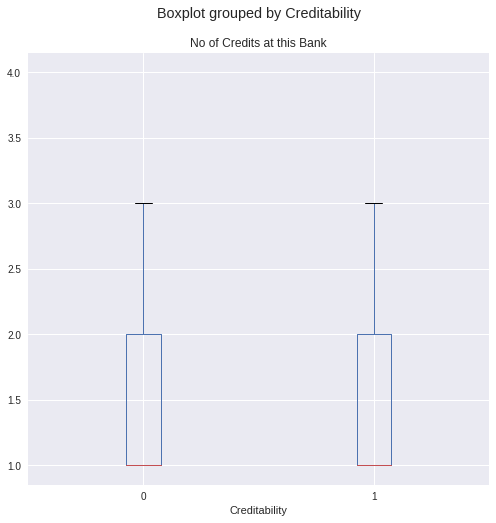

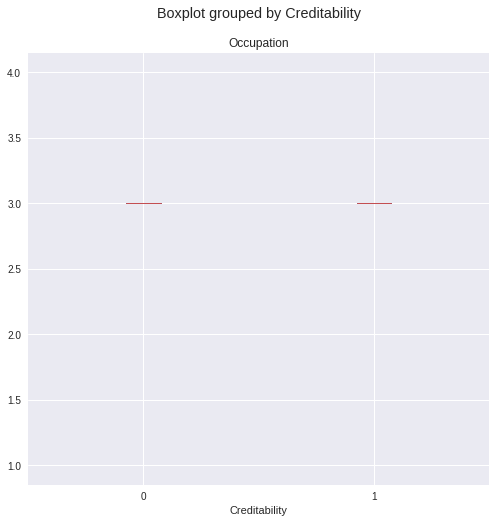

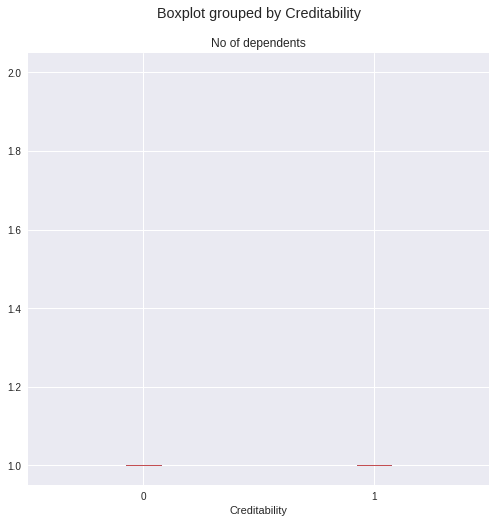

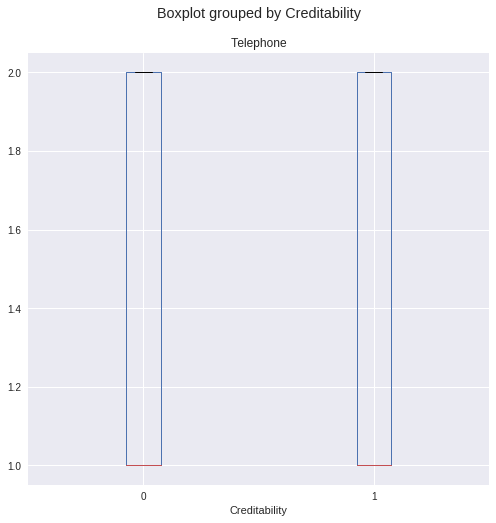

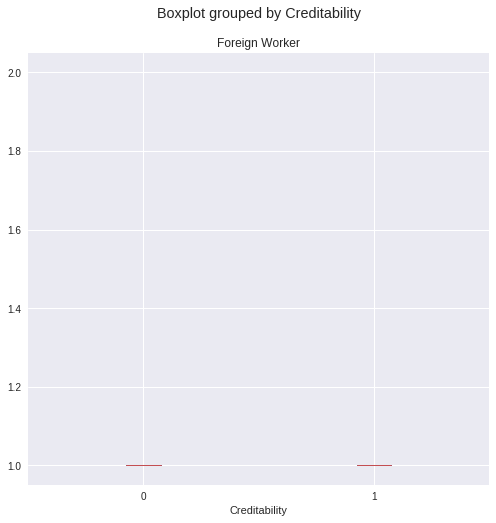

In [12]:
for item in df.columns:
  df.boxplot(column=item,by="Creditability", figsize=(8, 8))
  

**Detectando outliers **

In [13]:
for item in df.columns:
    print(item)
    q = df[item].quantile(0.99)
    print(q)
    print("")


Creditability
1.0

Account Balance
4.0

Duration of Credit (month)
60.0

Payment Status of Previous Credit
4.0

Purpose
10.0

Credit Amount
14180.389999999998

Value Savings/Stocks
5.0

Length of current employment
5.0

Instalment per cent
4.0

Sex & Marital Status
4.0

Guarantors
3.0

Duration in Current address
4.0

Most valuable available asset
4.0

Age (years)
67.00999999999999

Concurrent Credits
3.0

Type of apartment
3.0

No of Credits at this Bank
3.0

Occupation
4.0

No of dependents
2.0

Telephone
2.0

Foreign Worker
2.0



**Criando a matriz de corelação entre os daods.**

Text(0.5,1,'Tabela de correlação')

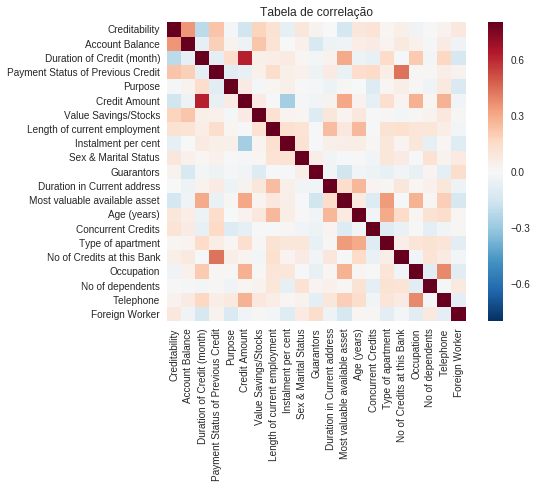

In [14]:
data_corr = df.corr()
sns.heatmap(data_corr , vmax=.8, square=True)
plt.title("Tabela de correlação")


**Criando gráficos de dispersão para compreender melhor a separação dos daods**


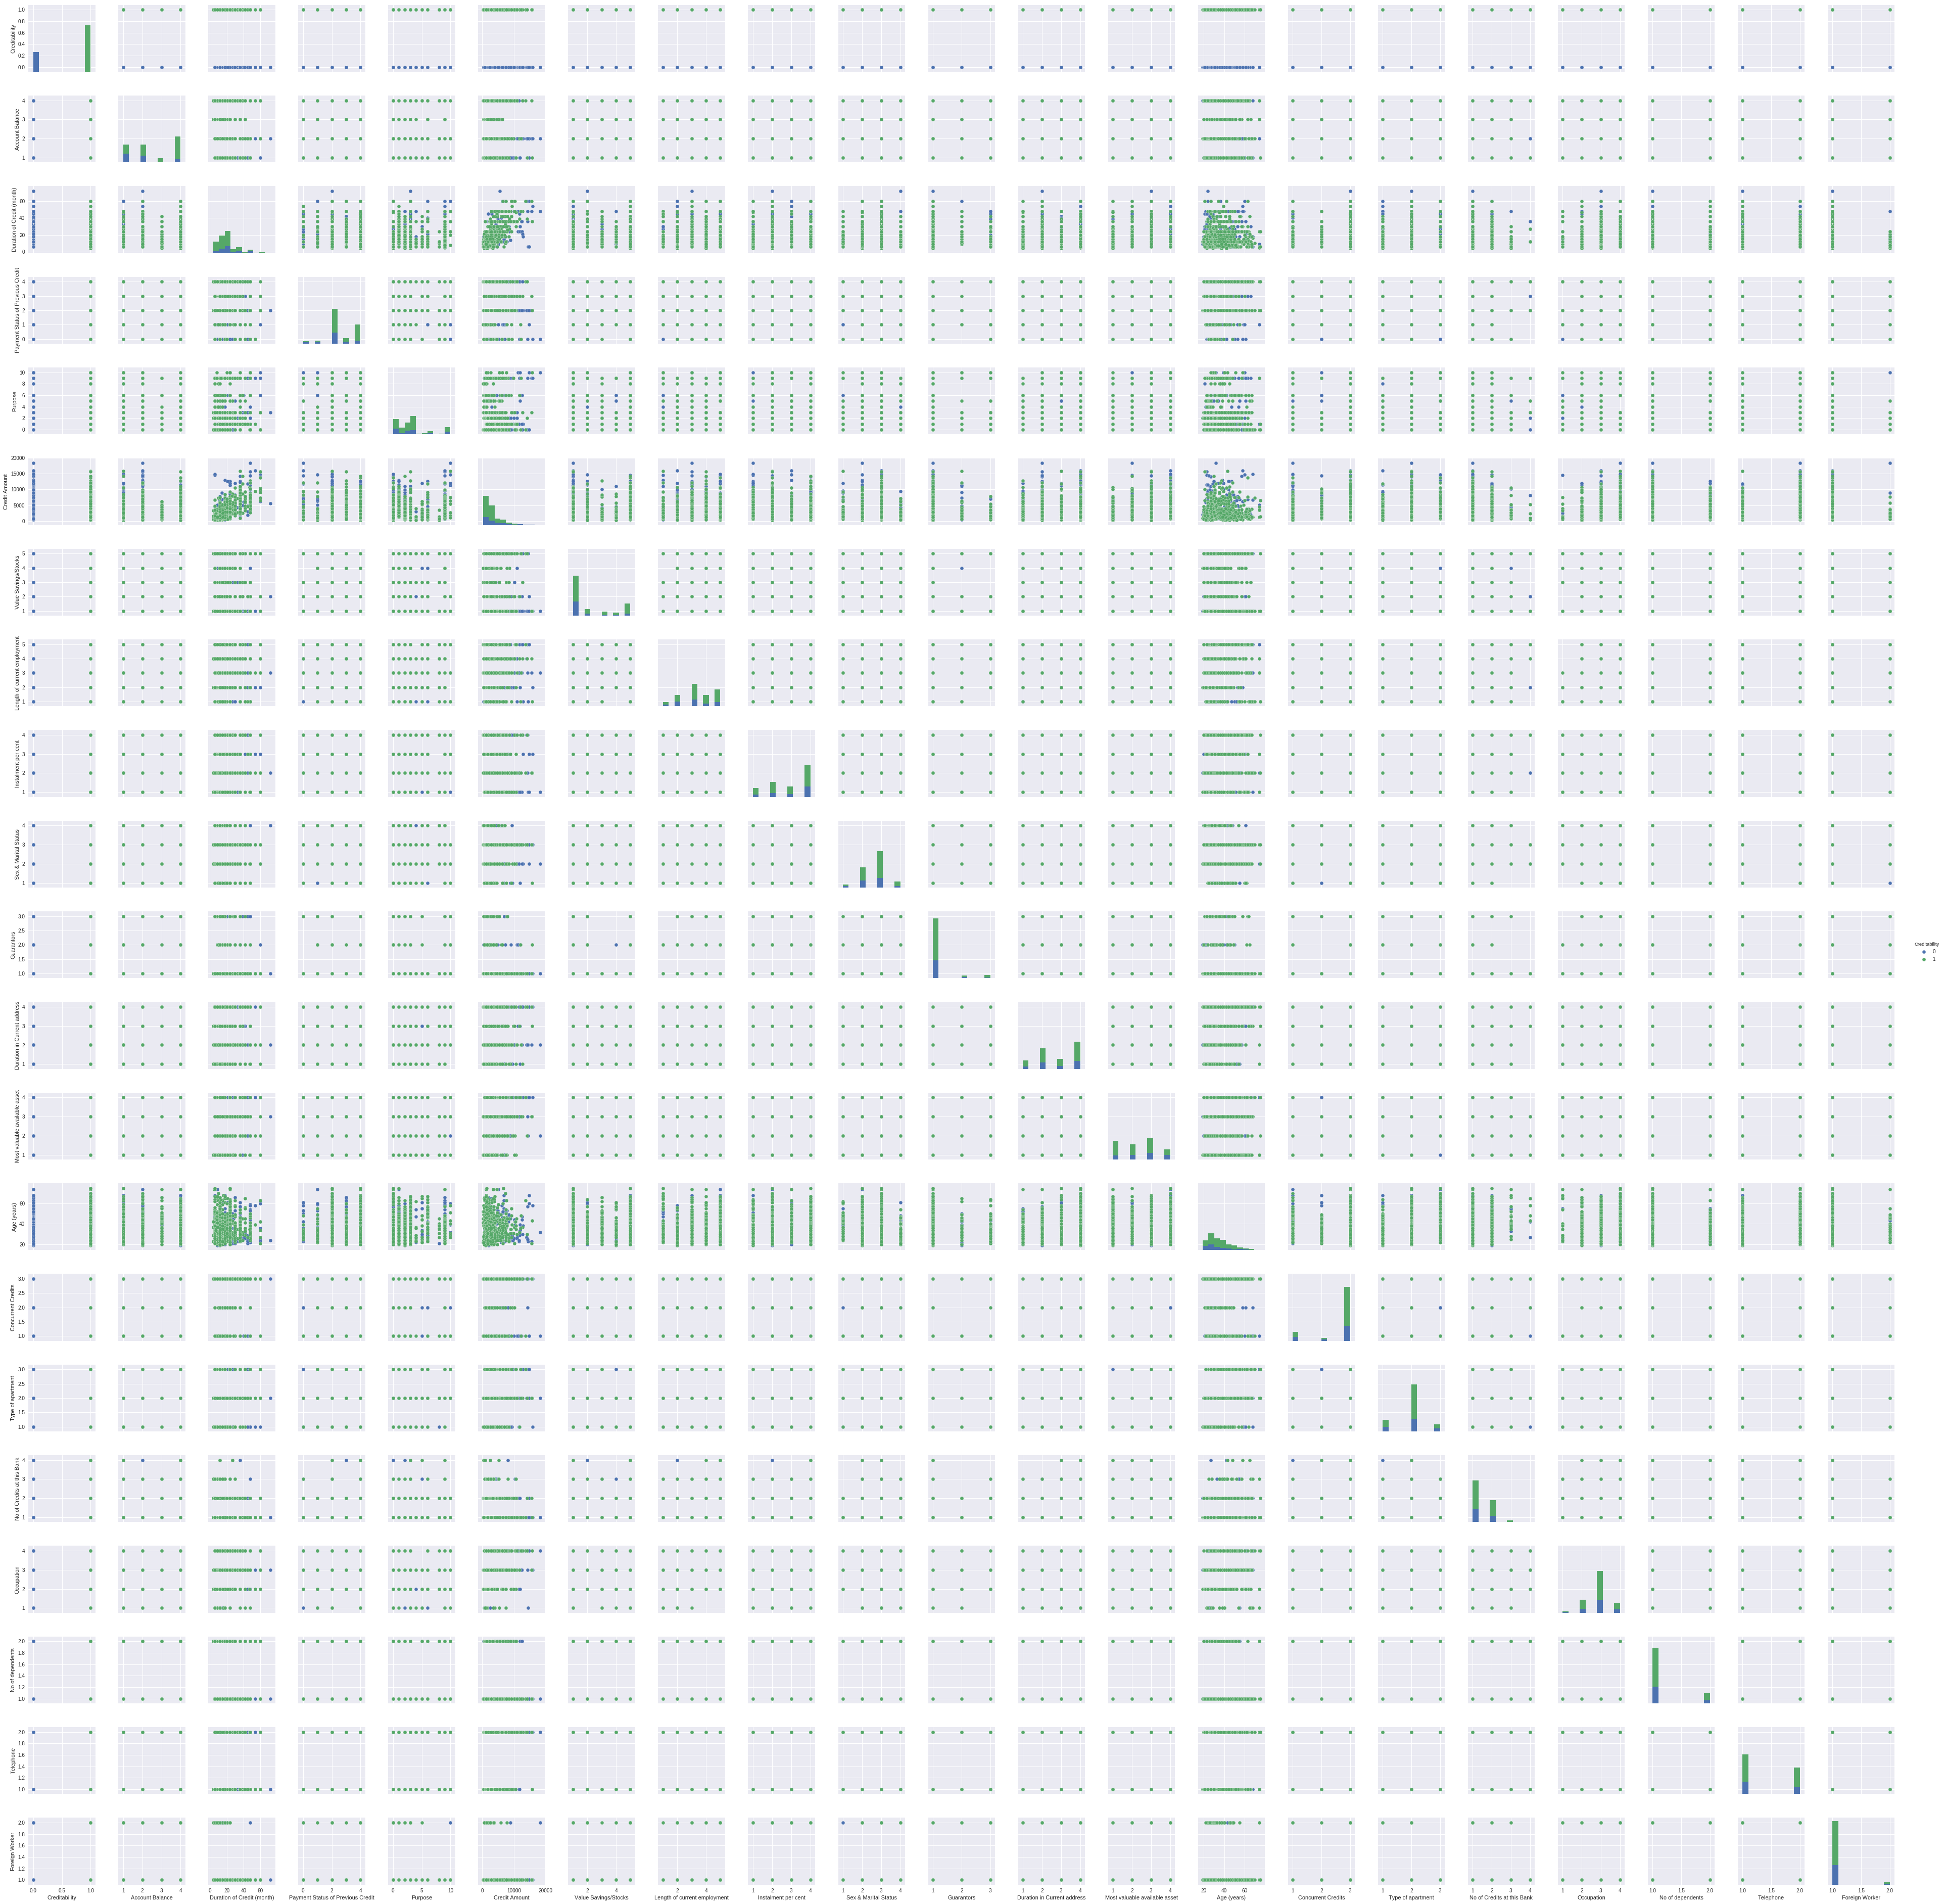

In [15]:
sns.pairplot(df, hue='Creditability')

In [0]:
def replaceClassification(x):
  if x == 1:
    return 'credit-worthy'
  else:
    return 'not credit-worthy'

In [0]:
df['Creditability'] = df['Creditability'].apply(lambda x:replaceClassification(x))

**Separando a base em treino e teste 80/20**

In [0]:
train, test = train_test_split(df, test_size=0.2)

In [0]:
y_treino =  train['Creditability']
y_teste =  test['Creditability']
y_treino_completo = df['Creditability']

In [0]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [0]:

x_treino = train.drop('Creditability',1)
x_teste = test.drop('Creditability',1)
x_treino_completo = df.drop('Creditability',1)  


**Método para criar  matriz de confusão**

In [0]:
def plot_confusion_matrix(cm, classes, 
                          normalize=False,
                          title="Matriz de confusão",
                          cmap=plt.cm.Blues):
   
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=30)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Matriz de confusão normalizada")
    else:
        print("Matriz de confusão sem normalização")

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Classe real')
    plt.xlabel('Classe prevista')

precision = true positive / (true positive + false positive)

Isso significa o número de vezes que uma classe foi predita corretamente dividida pelo número de vezes que a classe foi predita.

recall = true positive / (true positive + false negative)

Isso significa o número de vezes que uma classe foi predita corretamente (TP) dividido pelo número de vezes que a classe aparece no dado de teste (FN).

A F1-score é calculada da seguinte forma:

f1-score = 2((precision recall) / (precision + recall)

Essa medida é a média harmônica entre precisão e revocação. Com essa informação podemos dizer a performance do classificador com um indicador apenas.

Como essa medida é uma média, esta da uma visão mais exata da eficiência do classificador que apenas a precisão ou a revocação. **

In [0]:
def trainamento(model, x_treino, x_test, y_treino, y_test,nome_modelo,x_train_completo,y_treino_completo):
    print(nome_modelo)
    print("")
    classificador = model.fit(x_treino,y_treino)
    rest= classificador.predict(x_test)
    print("Acurácia do modelo " + str(accuracy_score(y_test, rest)))
    print("")
    print("Analisando o precision    recall  f1-score   support")
    print("")
    print (classification_report(y_test, rest))
    cm = confusion_matrix(y_test, rest)
    print("")
    scores = cross_val_score(model,x_train_completo, y_treino_completo, cv=5)
    print(" Acurácia - Cross-validation d: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
    print("")
    class_names = ['credit-worthy','not credit-worthy']
    plt.figure()
    plot_confusion_matrix(cm, classes=class_names,
                      title='Matriz de confusão')

    
    return classificador, rest
   

In [25]:
model = LogisticRegression()
rfe = RFE(model, 9)
fit = rfe.fit(x_treino_completo, y_treino_completo)
print( fit.support_)

[ True False  True False False  True False  True False  True False  True
 False False  True  True False False False  True]


**Selecionando as melhores features retornadas pelo select features da biblioteca sklearn **

In [0]:
x_treino_completo_lg = df[['Account Balance','Payment Status of Previous Credit','Value Savings/Stocks','Instalment per cent','Guarantors','Most valuable available asset','Concurrent Credits','Type of apartment','Foreign Worker']]
y_treino_completo_lg = df['Creditability']
x_treino_lg = train[['Account Balance','Payment Status of Previous Credit','Value Savings/Stocks','Instalment per cent','Guarantors','Most valuable available asset','Concurrent Credits','Type of apartment','Foreign Worker']]
y_treino_lg =  train['Creditability']
x_teste_lg = test[['Account Balance','Payment Status of Previous Credit','Value Savings/Stocks','Instalment per cent','Guarantors','Most valuable available asset','Concurrent Credits','Type of apartment','Foreign Worker']]
y_teste_lg =  test['Creditability']

Regressão Logistica

Acurácia do modelo 0.75

Analisando o precision    recall  f1-score   support

             precision    recall  f1-score   support

          0       0.68      0.34      0.46        61
          1       0.76      0.93      0.84       139

avg / total       0.74      0.75      0.72       200


 Acurácia - Cross-validation d: 0.72 (+/- 0.18)

Matriz de confusão sem normalização
[[ 21  40]
 [ 10 129]]


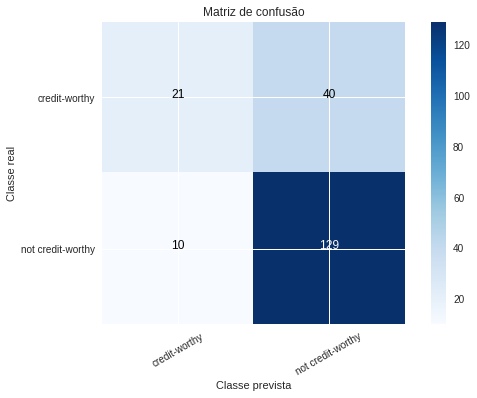

In [33]:
LogReg = LogisticRegression()
modelo_nome = "Regressão Logistica"
modeloReg,predict = trainamento(LogReg,x_treino_lg,x_teste_lg,y_treino_lg, y_teste_lg,modelo_nome,x_treino_completo_lg,y_treino_completo_lg)


**Buscando as 9 melhores features para o modelo árvore de decisão **

In [34]:
classificadortree = DecisionTreeClassifier(max_depth=3, min_samples_split=50)
rfe = RFE(classificadortree, 9)
fit = rfe.fit(x_treino_completo, y_treino_completo)
print( fit.support_)

[ True  True  True False  True  True  True False False False False False
 False False False False False  True  True  True]


In [0]:
x_treino_completo_ct = df[['Account Balance','Duration of Credit (month)','Payment Status of Previous Credit','Credit Amount','Value Savings/Stocks','Length of current employment','No of dependents','Telephone','Foreign Worker']]
y_treino_completo_ct = df['Creditability']
x_treino_ct = train[['Account Balance','Duration of Credit (month)','Payment Status of Previous Credit','Credit Amount','Value Savings/Stocks','Length of current employment','No of dependents','Telephone','Foreign Worker']]
y_treino_ct =  train['Creditability']
x_teste_ct = test[['Account Balance','Duration of Credit (month)','Payment Status of Previous Credit','Credit Amount','Value Savings/Stocks','Length of current employment','No of dependents','Telephone','Foreign Worker']]
y_teste_ct =  test['Creditability']

árvore de decisão

Acurácia do modelo 0.705

Analisando o precision    recall  f1-score   support

             precision    recall  f1-score   support

          0       0.57      0.13      0.21        61
          1       0.72      0.96      0.82       139

avg / total       0.67      0.70      0.63       200


 Acurácia - Cross-validation d: 0.71 (+/- 0.16)

Matriz de confusão sem normalização
[[  8  53]
 [  6 133]]


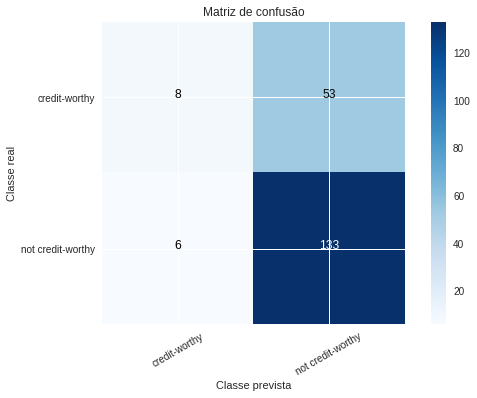

In [49]:
classificadortree = DecisionTreeClassifier(max_depth=3, min_samples_split=50)
modelo_nome = "árvore de decisão"
modelotree,predict = trainamento(classificadortree,x_treino_ct,x_teste_ct,y_treino_ct, y_teste_ct,modelo_nome,x_treino_completo_ct,y_treino_completo_ct)


KNN

Acurácia do modelo 0.625

Analisando o precision    recall  f1-score   support

             precision    recall  f1-score   support

          0       0.33      0.23      0.27        61
          1       0.70      0.80      0.75       139

avg / total       0.59      0.62      0.60       200


 Acurácia - Cross-validation d: 0.65 (+/- 0.06)

Matriz de confusão sem normalização
[[ 14  47]
 [ 28 111]]


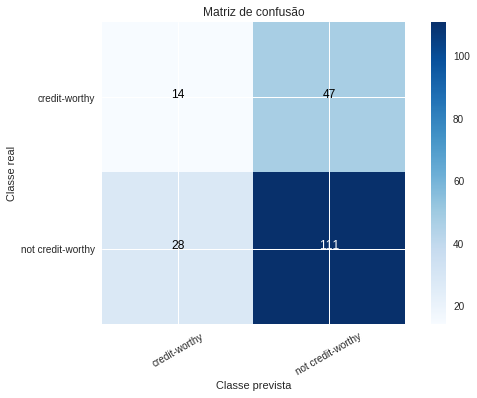

In [52]:
classificadorKNN = KNeighborsClassifier(n_neighbors=5)
modelo_nome = "KNN"
predictKNN = trainamento(classificadorKNN,x_treino,x_teste,y_treino, y_teste,modelo_nome,x_treino_completo,y_treino_completo)

Naive Bayes

Acurácia do modelo 0.73

Analisando o precision    recall  f1-score   support

             precision    recall  f1-score   support

          0       0.56      0.52      0.54        61
          1       0.80      0.82      0.81       139

avg / total       0.73      0.73      0.73       200


 Acurácia - Cross-validation d: 0.70 (+/- 0.19)

Matriz de confusão sem normalização
[[ 32  29]
 [ 25 114]]


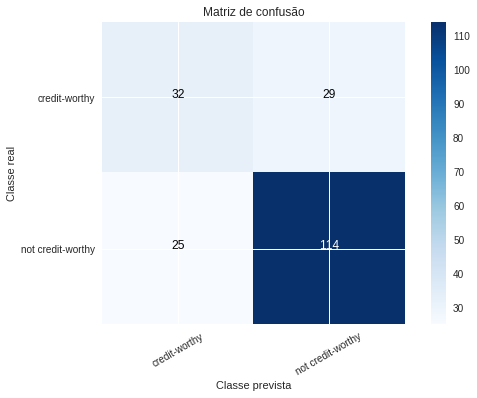

In [53]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
modelo_nome = "Naive Bayes"
predictKNN = trainamento(clf,x_treino,x_teste,y_treino, y_teste,modelo_nome,x_treino_completo,y_treino_completo)

In [0]:
x_treino_completo_lg2 = df[['Account Balance','Payment Status of Previous Credit']]
y_treino_completo_lg2 = df['Creditability']
x_treino_lg2 = train[['Account Balance','Payment Status of Previous Credit']]
y_treino_lg2 =  train['Creditability']
x_teste_lg2 = test[['Account Balance','Payment Status of Previous Credit']]
y_teste_lg2 =  test['Creditability']

In [0]:
LogReg = LogisticRegression()
modelo_nome = "Regressão Logistica"
modeloReg,predict = trainamento(LogReg,x_treino_lg2,x_teste_lg2,y_treino_lg2, y_teste_lg2,modelo_nome,x_treino_completo_lg2,y_treino_completo_lg2)